![image.png](https://www.jobboardfinder.com/news/wp-content/uploads/2017/04/arton8459-b7443-min.png)

# 2020 Kaggle Machine Learning & Data Science Survey: An EDA

> "*Based on responses from 20,036 Kaggle members, we’ve created this report focused on the 13% (2,675 respondents) who are currently employed as data scientists. For the fourth year, Kaggle surveyed its community of data enthusiasts to share trends within a quickly growing field.*"
[Kaggle Team *Enterprise Executive Summary Report*"](https://www.kaggle.com/kaggle-survey-2020).

This notebook is a exploratory data analysis (EDA) of the most comprehensive dataset available on the state of machine learning and data science today [2020 Kaggle Machine Learning & Data Science Survey](https://www.kaggle.com/c/kaggle-survey-2020). The survey answers covered demographic, education, employment, and technology usage to learn more about data science practitioners in 2020. 

## <center style="background-color:Gainsboro; width:40%;">Contents</center>
1. [Overview](#1.-Overview)<br>
2. [Key Insights](#2.-Key-Insights)<br>
3. [Profile](#3.-Profile)<br>
3.1. [Ages and Genders](#3.1.-Ages-and-Genders)<br>
3.2. [Countries](#3.2.-Countries)<br>
3.3. [Formal Education](#3.3.-Formal-Education)<br>

4. [The Industry](#4.-Industry)<br>
4.1. [Roles](#4.1.-Roles)<br>
4.2. [Experience](#4.2.-Experience)<br>
4.4. [Compensation](#4.3.Compensation)<br>

6. [Conclusion](#6.-Conclusion)<br>

*Please remember to upvote if you find this Notebook helpful!*

In [1]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt 
import plotly.graph_objects as go
import plotly.express as px 
import seaborn as sns

import os

In [2]:
df = pd.read_csv('../input/kaggle-survey-2020/kaggle_survey_2020_responses.csv')

df.loc[(df.Q3 == 'United States of America'),'Q3']='USA'
df.loc[(df.Q3 == 'United Kingdom of Great Britain and Northern Ireland'),'Q3']='UK+North. Ireland'
df.loc[(df.Q3 == 'Iran, Islamic Republic of...'),'Q3']='Iran'
df.loc[(df.Q4 == 'Some college/university study without earning a bachelor’s degree'),'Q4']='College/Uni study w/o a degree'
df.loc[(df.Q4 == 'Doctoral degree'),'Q4']='Doctor’s'
df.loc[(df.Q4 == 'Master’s degree'),'Q4']='Master’s'
df.loc[(df.Q4 == 'Bachelor’s degree'),'Q4']='Bachelor’s'
df.loc[(df.Q4 == 'No formal education past high school'),'Q4']='High school'
df.loc[(df.Q4 == 'I prefer not to answer'),'Q4']='No Answer'

df_fin = df.iloc[1:,:]

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3147: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
def facetgrid_bar(df,column, col_order, num_cols, x_axis, y_axis, hue, order,title, x_axis_title,y_axis_title):

    g = sns.FacetGrid(df, col=column, height=5,col_wrap = num_cols, col_order = col_order, sharex=False)
    
    g.map_dataframe(sns.barplot,data=df, x=x_axis, y = y_axis, hue = hue,
                    order=order,
                    dodge=False, palette = 'Blues_d')

    g.set_titles(col_template="{col_name}", row_template="{row_name}", size = 14)
    g.set_xticklabels(rotation = 90, size = 12) 
    g.fig.subplots_adjust(top=.9)
    g.fig.suptitle(title,fontsize=16, weight = 'bold')

    axes = g.axes.flatten()
    axes[0].set_ylabel(y_axis_title)
    for ax in axes:
        ax.set_xlabel(x_axis_title)

    g.fig.tight_layout()

In [4]:
#organizing multiple questions
Questions = {}

#List of unique questions
qnums = list(dict.fromkeys([i.split('_')[0] for i in df_fin.columns]))

for i in qnums:
    if i in ['Q1','Q2','Q3']:
        Questions[i] = df_fin[i]
    else:
        Questions[i] = df_fin[[q for q in df_fin.columns if q.startswith(i)]]

# **1. Overview**

In 2020, as in 2017, 2018, and 2019, the Kaggle platform conducted an industry survey with the intent to present a genuinely comprehensive view of the current state of data science and machine learning. The questionnaire collected 20,036 and was live for 3.5 weeks in October 2020.

As one can imagine, there is a lot to explore. The results can support insights about the people behind the data, machine learning application across different industries and the most valued skills to break into the Data Science field. The data has been published in a raw format while maintaining the privacy of the survey respondents.  

The report is organised as follows. Section [Profile](#3.-Profile) analyses the respondents' general profile, country, gender, and age. Next, a dive into the business data is shown in Section [The Industry](#4.-Industry). Lastly, Section [Skills](#5.-Skills) examines the skills, the tools and future trends.

# **2. Key Insights**

* India, the USA and Brazil are the countries with the most survey participants
* Respondents are predominantly young males. Women participation is rising. However, it does not reach 20%. A similar distribution is seen when analysing the individual countries
* Compared to a Bachelor's degree, a Master's degree is more common within the community. Especially for age groups above 24 years old
* For a Data Scientist career, a Master's degree seems to be favourable. The percentage of Data Scientists that hold a Masters degree is double if compared to Bachelor's degree holders
* Almost 60% of doctorates are working as Research Scientists. Also, PhD holders account for only 7% of currently unemployed. Unfortunately, 42% of currently unemployed hold a Bachelor degree

# **3. Profile**

Questions 1 to 5 focused on understanding the background of the Kaggle community. Since the field is relatively new, it is interesting to see how age, gender and country are distributed. Also, a look at their current occupation and formal education can help understand how are people preparing for a career in this Industry. 

The bar plots below give a general idea of the responses to the survey. The subsections that follow take a deeper dive, aiming to extract additional insights by combining the data available.

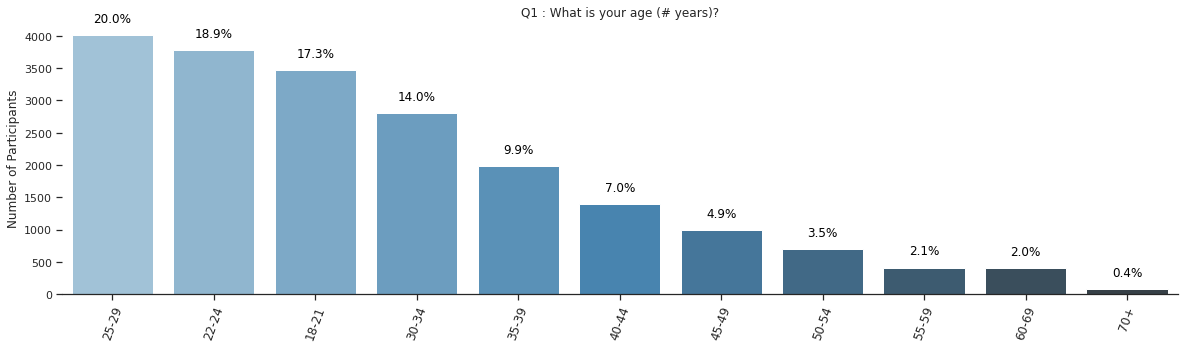

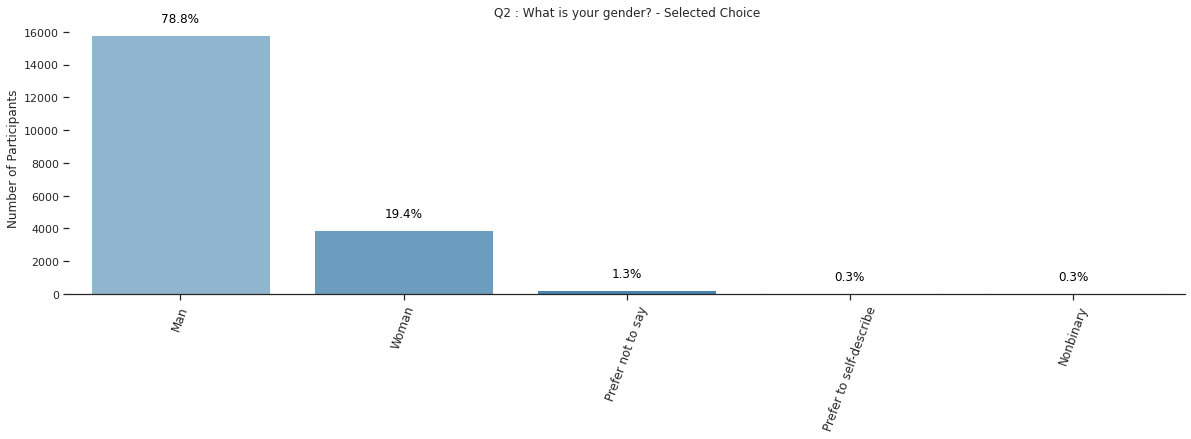

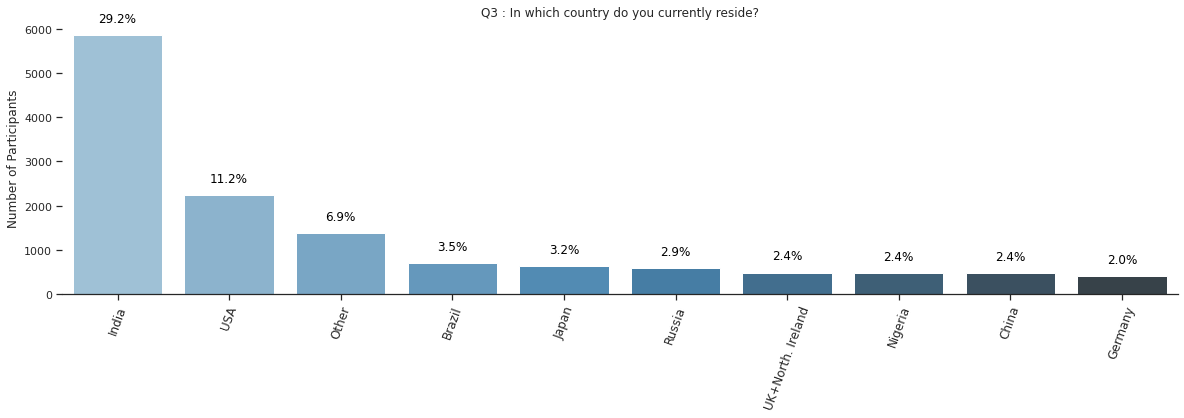

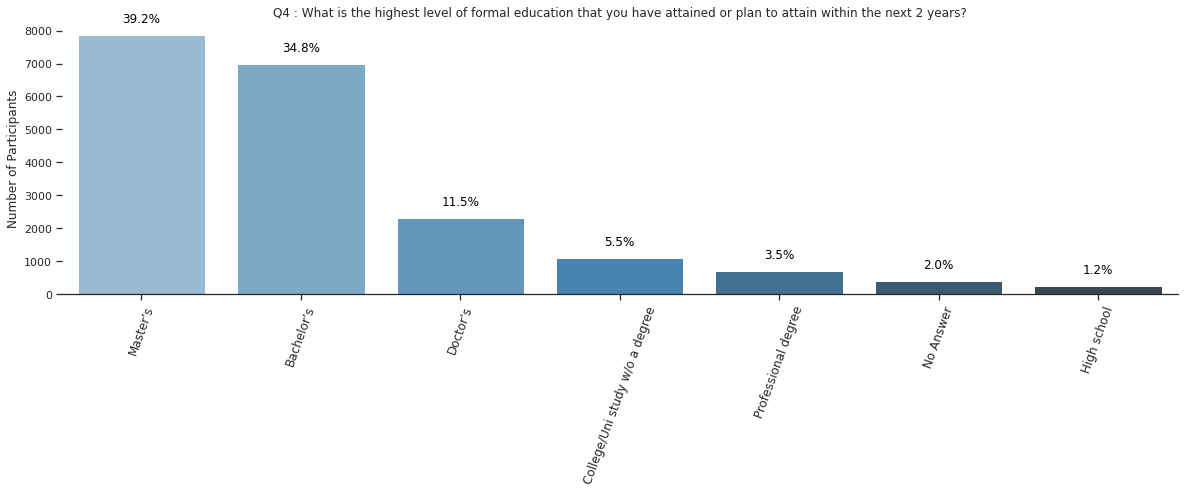

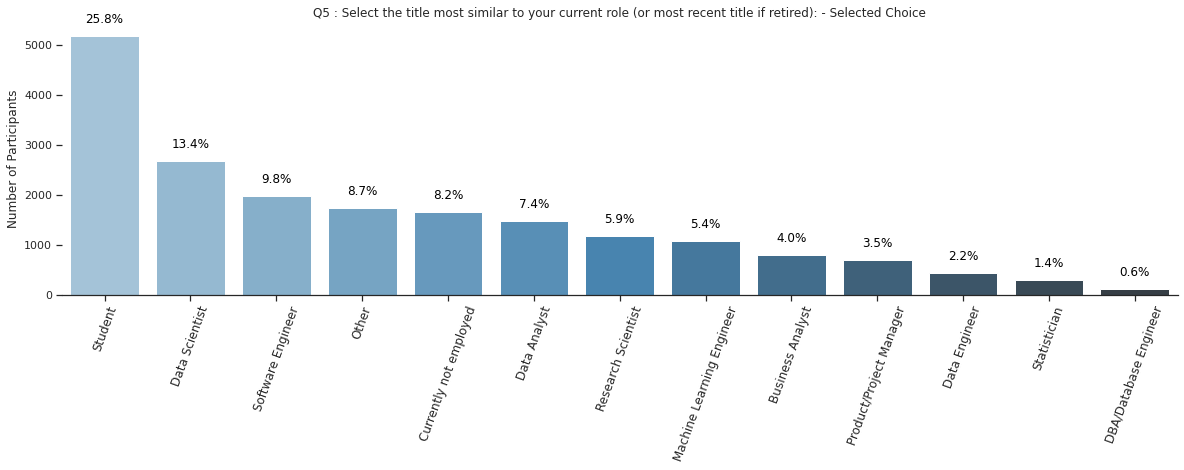

In [5]:
qs = qnums[1:6]
for i in qs:

    plt.figure(figsize=(20,5))
    sns.set(style="ticks", font_scale = 1)
    plot_order = df_fin[i].value_counts().index
    
    if i == 'Q3':
        ax = sns.countplot(data=df_fin, x=i, order = plot_order[0:10], palette = "Blues_d")
    else:
        ax = sns.countplot(data=df_fin, x=i, order = plot_order, palette = "Blues_d")
        
    sns.despine(top=True, right=True, left=True, bottom=False)
    plt.xticks(rotation=70,fontsize = 12)
    ax.set(xlabel=None)
    ax.set_ylabel('Number of Participants')
    plt.title(i + " : "+ df.loc[0,i])

    for p in ax.patches:
                 ax.annotate("%.1f%%" % (100*float(p.get_height()/df_fin.shape[0])), (p.get_x() + p.get_width() / 2., abs(p.get_height())),
                     ha='center', va='bottom', color='black', xytext=(0, 10),rotation = 'horizontal',
                     textcoords='offset points')

plt.show()


## 3.1. Ages and Genders##

* As expected, most survey participants are young, with approximately 40% being within 22 - 29 years old
* 17% of the participants are within the age of 18 - 21 years. It is exciting that young adults are already focusing their careers on this field and accumulating experience from an early age
* As of many STEM fields, there is a male predominancy. However, it is essential to highlight that the percentage of younger women (~ 4% / 18 - 29 years) diving into Data Science is double compared to the groups above 30 years old (~2%). Perhaps demonstrating that for younger generations, it is becoming more natural to select this career path
* Nonetheless, there is a long way to go if we consider a diversity gap. The percentage of women does not surpass 20%. Nonbinary, self-described, and undeclared together, do not reach 2% of participation

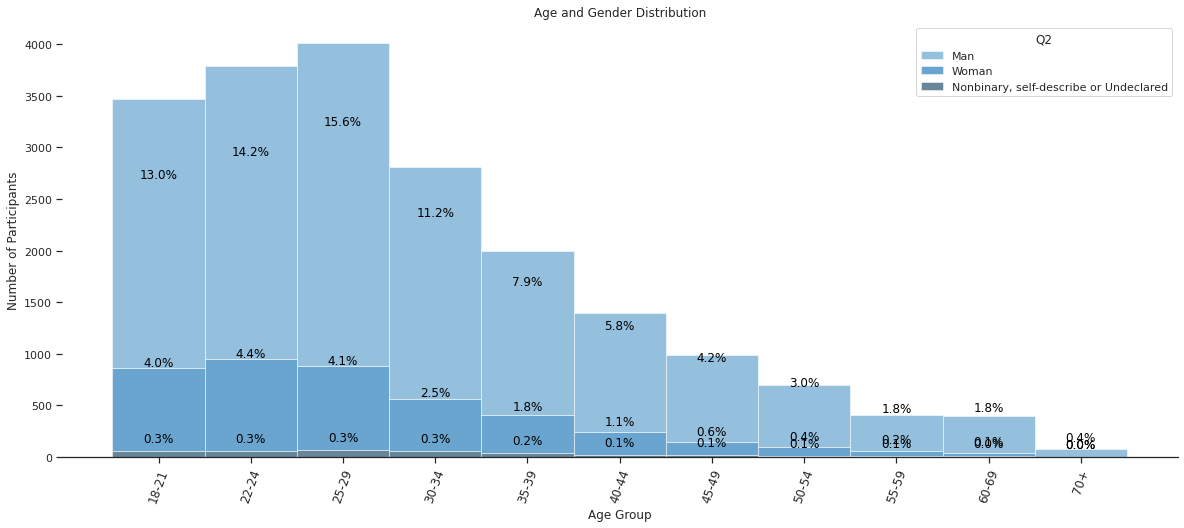

In [6]:
age_gender = df_fin[['Q1', 'Q2','Q3']]
age_gender = age_gender.sort_values(by=['Q1','Q2'])
need = ['Man', 'Woman']
age_gender['Q2'] = np.where(age_gender['Q2'].isin(need), age_gender['Q2'], 'Nonbinary, self-describe or Undeclared')

plt.figure(figsize=(20,8))
sns.set(style="ticks", font_scale = 1)
ax = sns.histplot(age_gender,x="Q1", hue="Q2", hue_order=['Man','Woman', 'Nonbinary, self-describe or Undeclared'],
    multiple="stack",
    palette="Blues_d",
    log_scale=False,
    linewidth= .5)
sns.despine(top=True, right=True, left=True, bottom=False)

plt.xticks(rotation=70,fontsize = 12)
ax.set_xlabel('Age Group')
ax.set_ylabel('Number of Participants')
plt.title("Age and Gender Distribution")

for p in ax.patches:
    ax.annotate("%.1f%%" % (100*float(p.get_height()/df_fin.shape[0])), (p.get_x() + p.get_width() / 2., abs(p.get_height())),
         ha='center', va='bottom', color='black', xytext=(0, 6),rotation = 'horizontal',
         textcoords='offset points')

Having a closer look at the additional options for gender, we see that younger generations are more comfortable selecting Nonbinary or Self-describe options. This behaviour is expected as it is relatively recent that such options are being respected and more widely accepted. 

However, the graph can also indicate a privacy concern. The number of participants who were not willing to share their gender is dominant compared to the other two options and follows a similar pattern between different age groups, from the age of 18 to the age of 39.

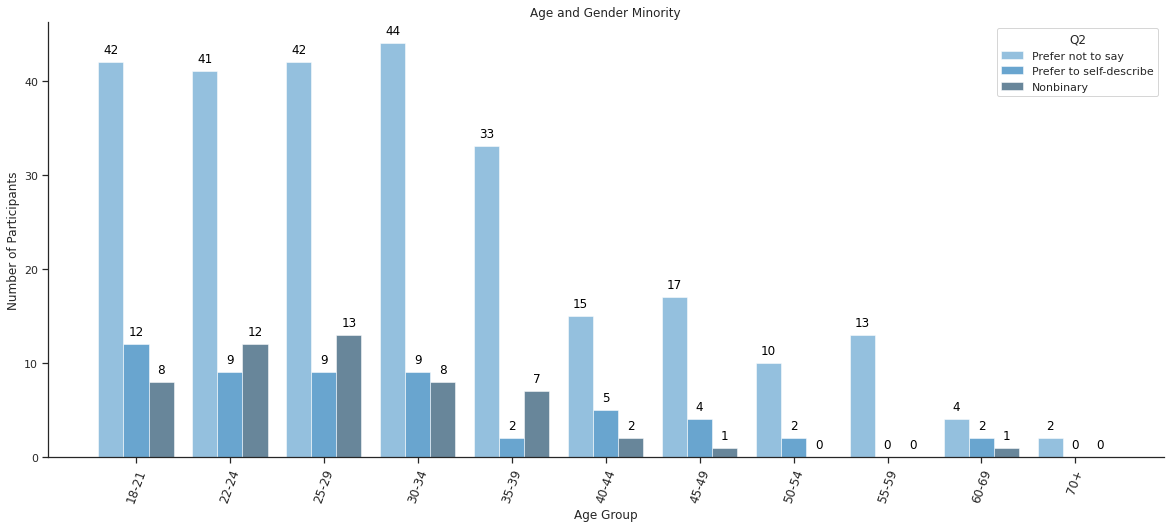

In [7]:
div_age = df_fin[['Q1', 'Q2']]
div_age = div_age.sort_values(by=['Q1','Q2'])
need = ['Prefer not to say', 'Prefer to self-describe', 'Nonbinary']
binary_ix = div_age[(div_age['Q2'] == 'Man') | (div_age['Q2'] == 'Woman')].index
div_age.drop(binary_ix, inplace = True)

plt.figure(figsize=(20,8))
sns.set(style="ticks", font_scale = 1)
ax = sns.histplot(div_age,x="Q1", hue="Q2", hue_order=['Prefer not to say', 'Prefer to self-describe', 'Nonbinary'],
    multiple="dodge",
    palette="Blues_d",
    shrink=.8,
    log_scale=False,
    linewidth= .5)

sns.despine(top=True, right=True, left=False, bottom=False)
plt.xticks(rotation=70,fontsize = 12)
ax.set_xlabel('Age Group')
ax.set_ylabel('Number of Participants')
plt.title("Age and Gender Minority")

for p in ax.patches:
    
    ax.annotate("%d" % (p.get_height()), (p.get_x() + p.get_width() / 2., abs(p.get_height())),
         ha='center', va='bottom', color='black', xytext=(0, 6),rotation = 'horizontal',
         textcoords='offset points')

## 3.2. Countries##

India, the USA and surprisingly Brazil are the top three nations contributing to the survey. India's participation is representative. If we sum the number of respondents from the top three to the top ten most represented countries, it would only account for 80% of the total of Indian participants. 

In [8]:
countries = df_fin.loc[(df_fin.Q3 != "Other")].Q3.value_counts().reset_index(name="Count").sort_values(by=["Count"], ascending=False).rename(columns={"index":"Country"})
country_list = list(countries.loc[:,'Country'])

age_gender.Q3 = age_gender.Q3.astype("category")
age_gender.Q3.cat.set_categories(country_list, inplace=True)

gender_country = pd.DataFrame(age_gender.groupby(['Q2','Q3']).size(), columns = ['Count'])
gender_country = gender_country.reset_index()

gender_country = gender_country.sort_values(by = ['Q2','Count'], ascending=True)

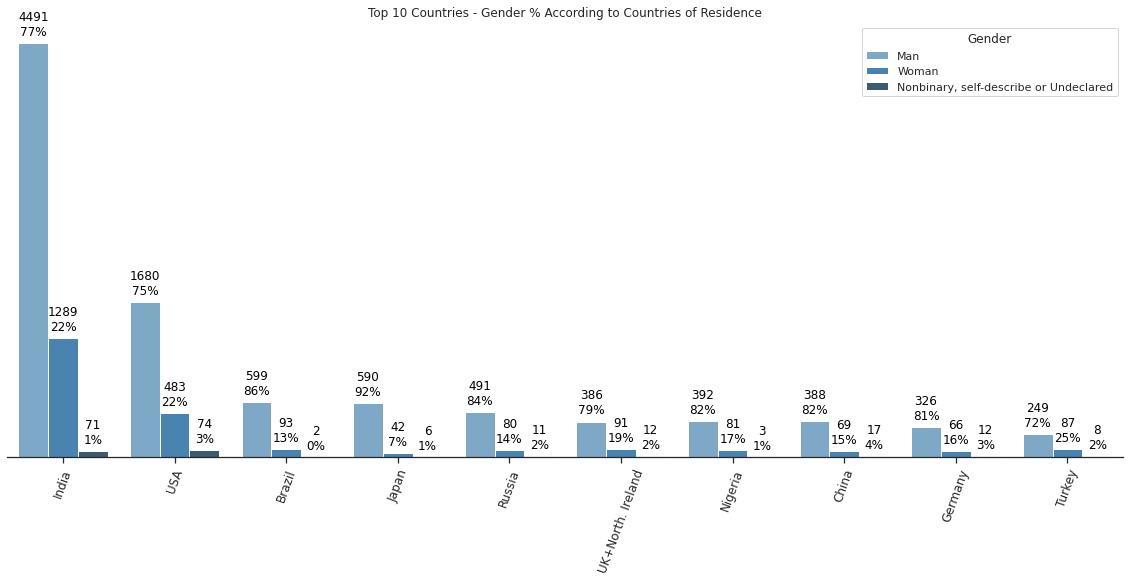

In [9]:
plt.figure(figsize=(20,8))
sns.set(style="ticks", font_scale = 1)

ax = sns.barplot(data=gender_country, x='Q3', y = 'Count', hue = 'Q2',order = country_list[0:10], hue_order = ['Man', 'Woman', 'Nonbinary, self-describe or Undeclared'],palette = "Blues_d")

sns.despine(top=True, right=True, left=True, bottom=False)
plt.xticks(rotation=70,fontsize = 12)
ax.set(xlabel=None)
ax.set(yticklabels=[])
ax.axes.get_yaxis().set_visible(False)
ax.set_ylabel('Number of Participants')
l = ax.legend()
l.set_title('Gender')
plt.title('Top 10 Countries - Gender % According to Countries of Residence')

i=0

for p in ax.patches:
    ax.annotate("%d\n%.0f%%" % (p.get_height(),100*float(p.get_height()/countries.iloc[i,1])), (p.get_x() + p.get_width() / 2., abs(p.get_height())),
    ha='center', va='bottom', color='black', xytext=(0, 5),rotation = 'horizontal',textcoords='offset points')
    i += 1
    if i == len(country_list[0:10]):
        i = 0   

* India is the most represented country, with over five thousand respondents. Interestingly, the number of women in India is approximately the total number of men in the USA
* While the number of women in India is representative (considering the quantity), the participation of women in all countries are similar, ranging from 15 - 20%
* None of the countries analysed had a significant percentage from the survey's remaining options: 'Nonbinary', 'Prefer not to say', 'Prefer to self-describe'. As we can see from the plot, only by aggregating them it is possible to arrive near to 1% of participation
* India has more than double the amount of respondents if compared to the U.S. However, the number of respondents that identify themselves as Nonbinary or self-describe is the same as the U.S. 
* USA, India and China are the countries with the highest number of 'Nonbinary', 'Prefer not to say' or 'Prefer to self-describe' respondents. 

The histogram below gives an idea of participants distribution by country. There are two clear outliers, around 2.000 and 5.800, which are the USA and India, respectively. The remaining countries have contributed with less than 500 entries, represented by the higher peak in the histogram. 

Text(0, 0.5, 'Number of Countries')

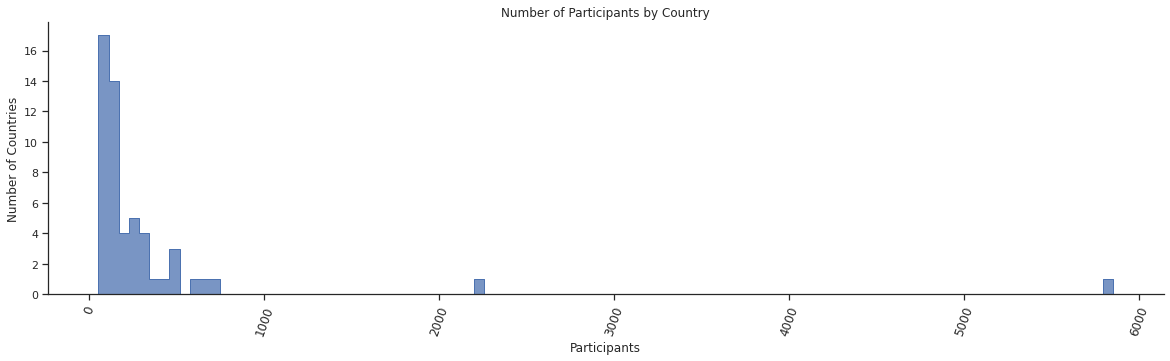

In [10]:
plt.figure(figsize=(20,5))
sns.set(style="ticks", font_scale = 1)

ax = sns.histplot(data=countries, x="Count",bins =100,stat ='count', element="step")

sns.despine(top=True, right=True, left=False, bottom=False)
plt.xticks(rotation=70,fontsize = 12)
ax.set_xlabel("Participants")
#ax.set(yticklabels=[])
plt.title('Number of Participants by Country')
ax.set_ylabel('Number of Countries')

The heatmap below shows how the age groups are distributed across the countries. For better visualisation, only the top 10 countries are analysed. The colour scale has been adapted to highlight the differences in the age groups the countries. Please note that India exceeds the scale for most of the age groups due to the number of participants, and this is why it presents the same colour for the first four age groups. 

Hover over the graph to visualise the number of participants for each category.

In [11]:
import plotly.graph_objects as go

age_country = age_gender[age_gender['Q3'].isin(country_list[0:10])]

fig = go.Figure(go.Histogram2d(x = age_country['Q1'], y = age_country['Q3'], 
                               colorscale="Cividis",zmin = 0, zmax=300))
fig.show()

* India is the only country that contains a high number of participants from the first age group. With 2.059 participants between 18-21 years, it is the only country where this age group contains more respondents than the remaining age groups
* China and the USA follow India as the countries where younger people are interested in Data Science
* Nigeria and China are the only countries with their most significant age groups as 22-24-year-olds. In contrast, Germany and Russia peak in the age group of 30-34 years olds
* The remaining countries have a crescent trend that peaks in the age group of 25-29-year-olds

## 3.3. Formal Education##

There is a continuous debate if a career in Data Science requires a specific formal education. With success histories from people that never had any formal education to people that currently hold PhD's, sometimes is difficult for newcomer to make a decision. Hopefully, some insights from this analysis are helpful.

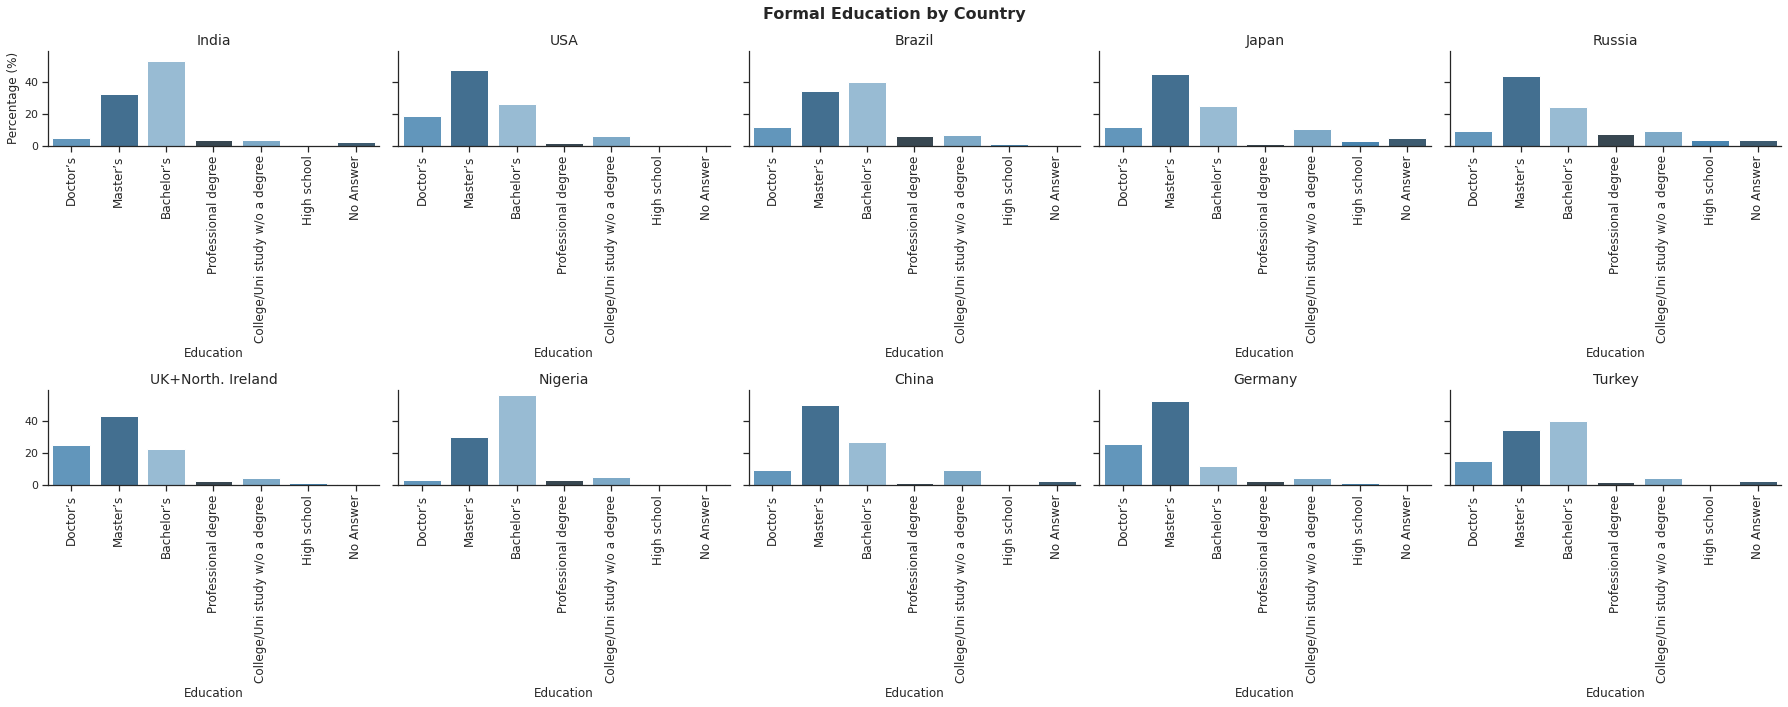

In [12]:
education = df_fin.loc[:,['Q1','Q2','Q3','Q4','Q5']].dropna()

educationCountry = education.groupby(['Q3','Q4']).size().reset_index(name="Count")
educationCountry['%'] = 100*(educationCountry['Count'].div(educationCountry.groupby('Q3')['Count'].transform('sum')))

facetgrid_bar(educationCountry,'Q3',country_list[0:10],5,'Q4','%','Q4', ['Doctor’s', 'Master’s', 'Bachelor’s', 'Professional degree','College/Uni study w/o a degree','High school','No Answer'],'Formal Education by Country', 'Education','Percentage (%)')    

* Differently from the conclusion we had by analysing the data as a whole, we see different individual countries' trends. Considering the top 10 countries in survey participation, India, Nigeria, Brazil and Turkey, are countries where most participants had a Bachelor's degree. All the remaining countries have the majority holding MSc. degrees, with at least 40% percentage
* UK, USA and Germany are the countries with a higher percentage of PhD's participants
* It is interesting that China, Russia and Japan have more expressive participation of people with some College or Uni study without a degree. Perhaps it could be something more related to their specific education tracks or self-study

The analysis below compares the country with a higher percentage of doctorates and masters degrees, considering all the participating countries. For comparison, the countries with a higher number of such degrees are also listed.

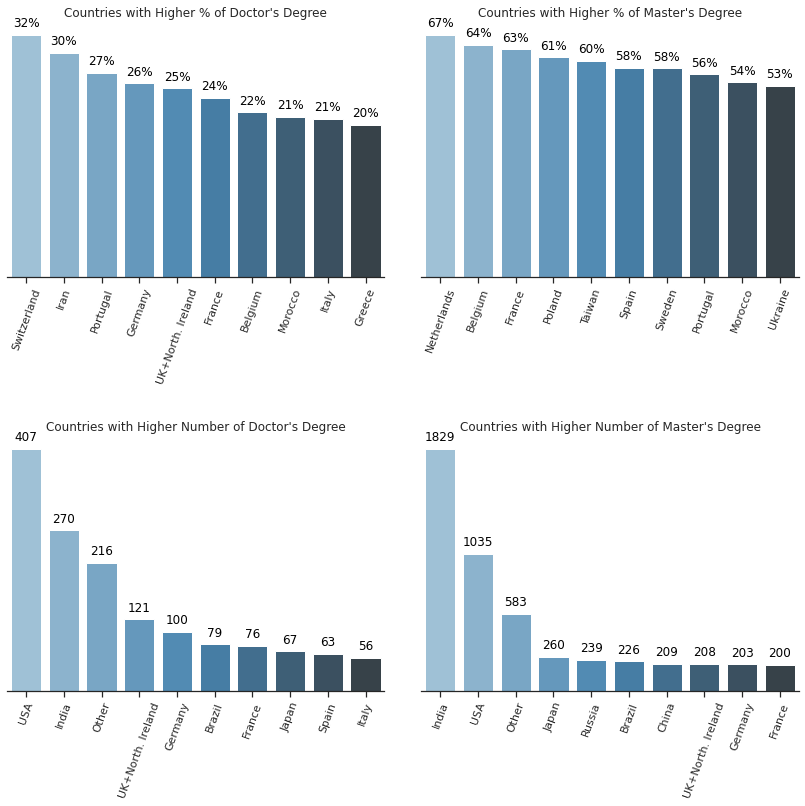

In [13]:
PhD_country_percent = educationCountry[educationCountry['Q4'] == 'Doctor’s'].sort_values(by = ['%'], ascending = False,ignore_index = True)
#PhD_country[PhD_country['%']==PhD_country['%'].max()]
MSc_country_percent = educationCountry[educationCountry['Q4'] == 'Master’s'].sort_values(by = ['%'], ascending = False,ignore_index = True)

PhD_country = educationCountry[educationCountry['Q4'] == 'Doctor’s'].sort_values(by = ['Count'], ascending = False,ignore_index = True)
#PhD_country[PhD_country['%']==PhD_country['%'].max()]
MSc_country = educationCountry[educationCountry['Q4'] == 'Master’s'].sort_values(by = ['Count'], ascending = False,ignore_index = True)

PhD_country_percent = PhD_country_percent.rename(columns={"%": "y", "Q3": "x"})
MSc_country_percent = MSc_country_percent.rename(columns={"%": "y", "Q3": "x"})
PhD_country = PhD_country.rename(columns={"Count": "y", "Q3": "x"})
MSc_country = MSc_country.rename(columns={"Count": "y", "Q3": "x"})

fig, axarr = plt.subplots(2, 2, figsize=(12, 12))

sns.set(style="ticks", font_scale = 1)
sns.despine(top=True, right=True, left=True, bottom=False)

dfs = [PhD_country_percent,MSc_country_percent, PhD_country,MSc_country]
z = 0
for j in range(0,2):
    for i in range(0,2):
        ax = sns.barplot(data=dfs[z], x='x', y = 'y',order = list(dfs[z].iloc[0:10, 0]),ax=axarr[j][i], palette = "Blues_d")
        if z < 2:
            for p in ax.patches:
                ax.annotate("%.0f%%" % (p.get_height()), (p.get_x() + p.get_width() / 2., abs(p.get_height())),
                ha='center', va='bottom', color='black', xytext=(0, 5),rotation = 'horizontal',textcoords='offset points')
        else: 
            for p in ax.patches:
                ax.annotate("%.d" % p.get_height(), (p.get_x() + p.get_width() / 2., abs(p.get_height())),
                ha='center', va='bottom', color='black', xytext=(0, 5),rotation = 'horizontal',textcoords='offset points')
        axarr[j][i].set(xlabel=None)
        axarr[j][i].set(yticklabels=[])
        axarr[j][i].axes.get_yaxis().set_visible(False) 
        axarr[j][i].set_xticklabels(list(dfs[z].iloc[0:10, 0]),rotation=70)
        z +=1
        
axarr[0][0].set_title("Countries with Higher % of Doctor's Degree")
axarr[0][1].set_title("Countries with Higher % of Master's Degree")
axarr[1][0].set_title("Countries with Higher Number of Doctor's Degree")
axarr[1][1].set_title("Countries with Higher Number of Master's Degree")

fig.tight_layout(pad=3.0)    
      
plt.show()

* Considering only the percentage of the number of PhD's, the top countries listed previously do not rank within the top positions
* Considering quantity, as expected, India and the USA are in the top ranking, and the graph is similar to the previous analysis. However, it is interesting to highlight France, Spain and Italy. The three countries rank within the top ten countries with a higher number and a higher percentage of doctors
* Regarding PhDs, USA surpasses India in quantity (and consequently %) even though the USA has fewer participants overall if compared to India
* A wide adoption of Masters path is observed, e.g. percentages as high as 67% for the Netherlands. However, even in First World Countries, the percentage of doctorates does not go much above 30%. It could explain the high employability that a PhD certificate can offer
* European countries are the majority when considering the percentage of participants for either degree. From other continents, we see Taiwan, Morocco and Iran
* Belgium, France, Morocco, and Portugal are the only countries that appear on the top ranks of Countries with Higher % and Higher Number of Masters and Doctors. They probably have the right incentives for Master's students to continue their academic career
* One would expect that the country with a higher percentage of Master's would naturally have a higher percentage of Doctoral degrees, but it is not the case. Netherland contains more Masters degrees but is ranked 20th, with ~15% of PhDs. With the highest percentage of Doctoral degrees, Switzerland is ranked only 14th for Masters degrees, with 51%. It could indicate that foreigners go to other countries to pursue their PhD's.

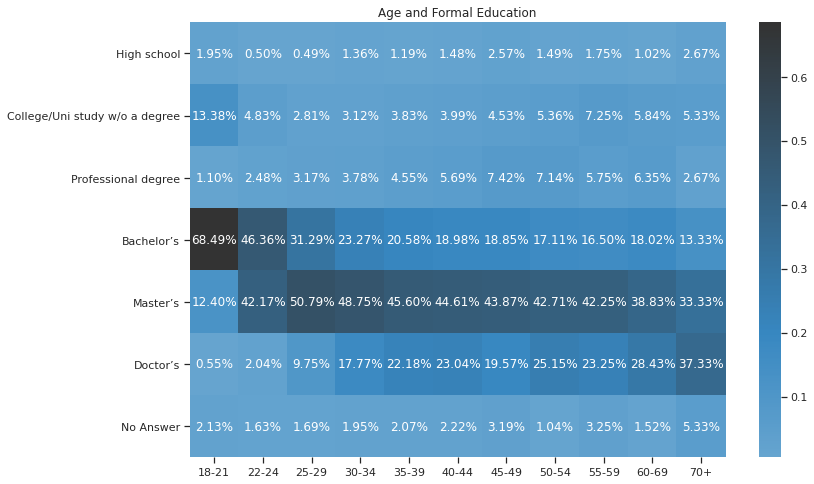

In [14]:
education = df_fin.loc[:,['Q1','Q2','Q3','Q4','Q5']].dropna()

educationAge = education.groupby(['Q1','Q4']).size().reset_index(name="Count")
educationAge['%'] = educationAge['Count'].div(educationAge.groupby('Q1')['Count'].transform('sum'))

educationAge_wide = educationAge.pivot(index='Q4', columns='Q1', values='%')
order = ['High school','College/Uni study w/o a degree','Professional degree','Bachelor’s','Master’s' , 'Doctor’s','No Answer', ]
educationAge_wide = educationAge_wide.reindex(order)

plt.figure(figsize=(12,8))

sns.heatmap(educationAge_wide, annot=True, fmt='.2%', yticklabels='auto', cmap=sns.color_palette("Blues_d", as_cmap=True), center=.2)
plt.xlabel('')
plt.ylabel('')
plt.title('Age and Formal Education')
plt.show()

* Up to the age group 30-34 years old, a Bachelor's degree is more common than a Doctor's degree. After 35 years old,  PhD's have greater participation than Bachelor's degrees 
* Approximately a quarter of the people with 50+ hold a PhD, a percentage that keeps rising with the age
* The Master's degree is predominant with almost all age groups. A Bachelor degree is only dominant within the younger population, which makes sense since a Bachelor is a requirement for the MSc. degree
* Analysing the first three columns and the Master's and Bachelor's rows, there is a clear transition on the heatmap. It demonstrates the formal education path the student continue their education from Bachelor to Masters degrees around the age of 22+
* The fact that the Master's degree starts to fall only after 35+ could indicate that people seek this specialisation as a later step in their careers. Besides, as the Masters' percentage fell, the Doctoral level has risen, showing another natural transition from MSc to PhD student

## 4. The Industry##

This section analyses roles distribution, the relationship between the roles and expected years of experience,  and how the compensation varies across the countries.

## 4.1. Roles##

The heatmap below identifies the relationship between the roles and the most common formal education of the respondents. PhD holders will likely become Research Scientist (58%) or Statistician (27%), while 50% of Data Scientist hold a Master's degree.

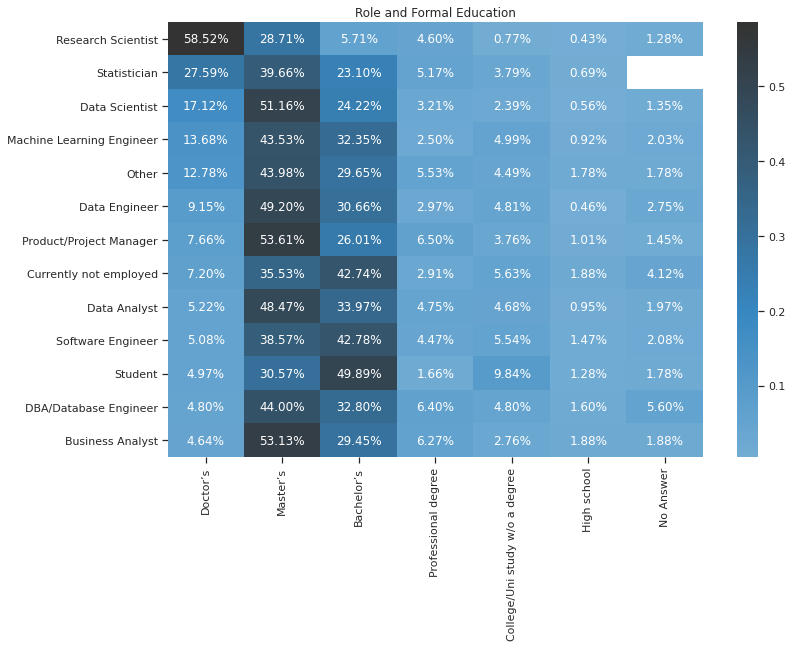

In [15]:
education_role = education.groupby(['Q5','Q4']).size().reset_index(name="Count")

total = education_role.groupby('Q5').Count.sum().reset_index(name="Total")

education_role = education_role.join(total.set_index('Q5'), on='Q5')

education_role['Percent'] = education_role.Count/education_role.Total

education_role_wide = education_role.pivot(index='Q5', columns='Q4', values='Percent')

columns = ['Doctor’s', 'Master’s', 'Bachelor’s', 'Professional degree','College/Uni study w/o a degree','High school','No Answer']
order=['Research Scientist','Statistician','Data Scientist','Machine Learning Engineer','Other','Data Engineer','Product/Project Manager','Currently not employed',
       'Data Analyst','Software Engineer','Student','DBA/Database Engineer','Business Analyst']

education_role_wide = education_role_wide.reindex(order).reindex(columns=columns)

plt.figure(figsize=(12,8))

sns.heatmap(education_role_wide, annot=True, fmt='.2%', yticklabels='auto', cmap=sns.color_palette("Blues_d", as_cmap=True), center=.2)
plt.xlabel('')
plt.ylabel('')
plt.title('Role and Formal Education')
plt.show()

* The initial analysis has shown that most participants were students. From the above heatmap, we understand that most of them are pursuing their Bachelor's degree, followed by a Master's degree
* Overall, 39% of participants hold a Masters and 34% Bachelors degrees. Interesting that the Master's degree is slightly more common than BSc. degree
* The majority of Students are currently pursuing a Bachelor degree. A Master's degree accounts for 30%, and a doctorate only 5%. However, this number could be misleading as some Students might also be working and selected their current role instead of the "Student" option
* Almost 14% of all respondents were Data Scientists. For this career, a Master's degree seems to be favourable, as more than double the quantity of Master's holders is a Data Scientist if compared to Bachelor's holder. 
* Most roles are predominately occupied by participants that hold or will soon hold an MSc. degree. A 20% difference between a bachelor and an MSc degree is observed for Data Scientist, Product/Project Manager, Data Engineer and Business Analyst. These roles seem to favour the most MSc. in contrast to a bachelor
* To become a Research Scientist, a PhD seems to be a wise investment 
* Regarding unemployment, a PhD is also the right path since only 7% of doctoral degree holders are unemployed. It is an expressive difference if compared to 35% and 42% of Master's and Bachelor's degrees holders.

## 4.2. Experience##

Data Science is a career that has attracted people from different fields, not only inspiring young ones but also motivating other to change their career path (like me!). In this section we take a look on the years of programming experience most respondents have, and how this effect their current roles.

From the bar graph below, we can see that the programming experience follows a normal distribution with half of the participants have between one and five years of experience. There is also a significant participation people that has started coding less than a year ago. 


In [16]:
role_xp = df_fin.groupby(['Q5','Q6']).size().reset_index(name="Count")

total = role_xp.groupby('Q5').Count.sum().reset_index(name="Total")

role_xp = role_xp.join(total.set_index('Q5'), on='Q5')

role_xp['Percent'] = role_xp.Count/role_xp.Total

columns = ['I have never written code','< 1 years','1-2 years','3-5 years','5-10 years','10-20 years','20+ years']

order=['Currently not employed','Business Analyst','Product/Project Manager','Data Analyst','Student','Other',
       'Research Scientist', 'Statistician',  'Data Scientist', 'Machine Learning Engineer', 'Data Engineer','Software Engineer','DBA/Database Engineer']

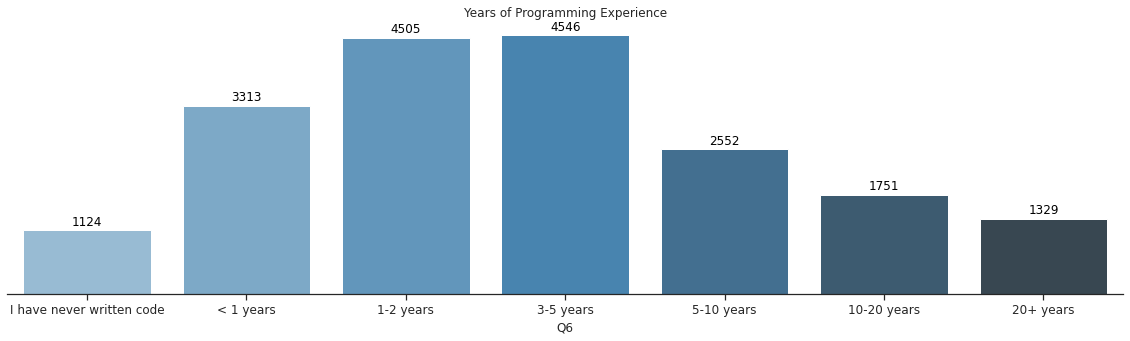

In [17]:
xp = df_fin.groupby(['Q6']).size().reset_index(name="Count")

plt.figure(figsize=(20,5))
sns.set(style="ticks", font_scale = 1)

ax = sns.barplot(data=xp, x='Q6', y = 'Count', order = columns,palette = "Blues_d")

sns.despine(top=True, right=True, left=True, bottom=False)
plt.xticks(rotation=0,fontsize = 12)
ax.set_ylabel('Number of Participants')
plt.title("Years of Programming Experience")
ax.set(yticklabels=[])
ax.axes.get_yaxis().set_visible(False) 

for p in ax.patches:
         ax.annotate("%d" % p.get_height(), (p.get_x() + p.get_width() / 2., abs(p.get_height())),
             ha='center', va='bottom', color='black', xytext=(0, 2),rotation = 'horizontal',
             textcoords='offset points')

plt.show()

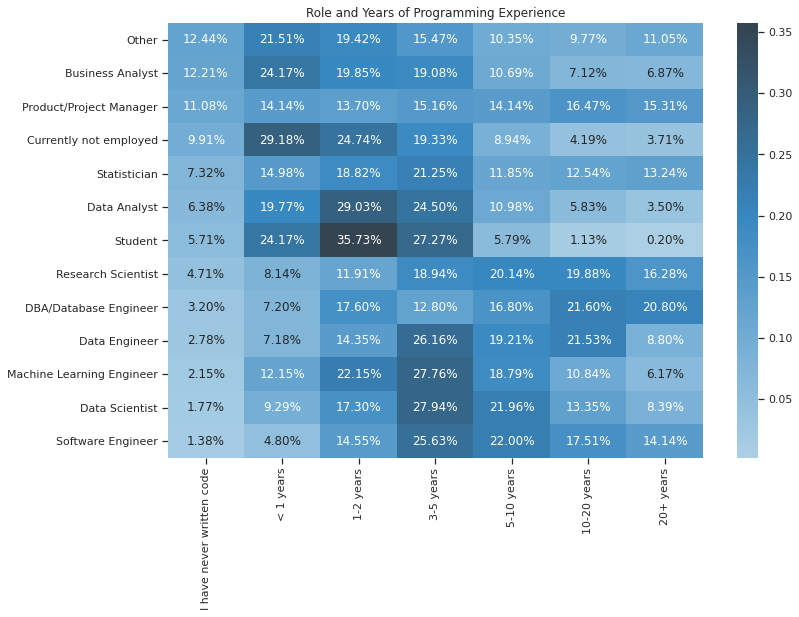

In [18]:
role_xp_wide = role_xp.pivot(index='Q5', columns='Q6', values='Percent')
role_xp_wide = role_xp_wide.sort_values(by = ['I have never written code'], ascending = False)#ignore_index = True)
role_xp_wide = role_xp_wide.reindex(columns=columns)

plt.figure(figsize=(12,8))

sns.heatmap(role_xp_wide, annot=True, fmt='.2%', yticklabels='auto', cmap=sns.color_palette("Blues_d", as_cmap=True), center=.2)
plt.xlabel('')
plt.ylabel('')
plt.title('Role and Years of Programming Experience')
plt.show()

* Business Analyst and Product Manager are the roles with higher percentage of participants that have never written code. Besides, the percentage is quite spread along the "years of experience" axis meaning that the group is quite diverse
* As expected due to how population is distributed, most roles have a higher concentration of respondents within one and five years of experience. Roles that are more common 1-2 years of experience are Data Analyst, Student and DBA/DB Engineer. Outliers of this behaviour are for Business Analysts and currently not employed, presenting a higher percentage of < 1 years of programming experience. As such, to initiate a career, Business, Data Analyst and DBA/DB Engineer could be promising options.
* In contrast, for Software Engineer, Data Scientist, ML Engineer, Data Engineer it is quite clear that most of the population is concentrated around 3-5 years of experience
* Most students have classified themselves as 1-5 years of experience. While that may be true since they are programming all through University, most employers don't value this period as a valid experience
* It is also interesting to see the relationship between the "Currently not Employed" and the years of programming experience. As one reaches 5-10 years of experience, the percentage drops significantly. Employers seem to favour candidates with more than 2 years of experience, as the percentage drops from almost 30% (< 1 year) to 20% (3-5 years). 

## 4.3. Compensation##

The survey also asked regarding the yearly salary of the participants. Due to the monetary exchange rate, it is not fair to compare the salaries in different countries. For example, for a Data Scientist in Brazil the salary is around 30.000 USD dollars per year, going up to 50.000 USD per year ([source](https://www.salario.com.br/profissao/cientista-de-dados-data-scientist/)). From a Brazilian (I am Brazilian :D), perspective that can provide a comfortable life. One reason being that one Brazilian Real is about four Dollars and the living cost is much lower if compared to the USA. 

For this reason, with regards to compensation it is delicate to directly compare salaries, especially between third and first world countries. The discrepancy between the salaries range can affect how we interpret the data, as we are interpreting all countries at the same time. To avoid the situation, the salaries are analysed by Country. 

Below it is the distribution of the salaries of the top five countries that had most participants on the survey. It it noticeable how the distribution across countries differ, however, it does not mean directly that other countries are underpaying their employees. The salaries also have different ranges due to the different currencies.

In [19]:
compensation = df_fin.loc[:,['Q1','Q2','Q3','Q4','Q5','Q6','Q24']].dropna()

order = ['$0-999','1,000-1,999','2,000-2,999','3,000-3,999','4,000-4,999','5,000-7,499',
'7,500-9,999', '10,000-14,999','15,000-19,999','20,000-24,999','25,000-29,999',
'30,000-39,999','40,000-49,999', '50,000-59,999','60,000-69,999','70,000-79,999',
'80,000-89,999','90,000-99,999','100,000-124,999','125,000-149,999','150,000-199,999',
'200,000-249,999','250,000-299,999','300,000-500,000','> $500,000']

order_i = ['0-0,9','1-1,9','2-2,9','3-3,9','4-4,9','5-7,49',
'7.5-9,9', '10-14,9','15-19','20-24','25-29',
'30-39','40-49', '50-59','60-69','70-79',
'80-89','90-99','100-124','125-149','150-199',
'200-249','250-299','300-500','> 500']

for i in range(0,len(order)):
    compensation.loc[(compensation.Q24 == order[i]),'Q24']=order_i[i]

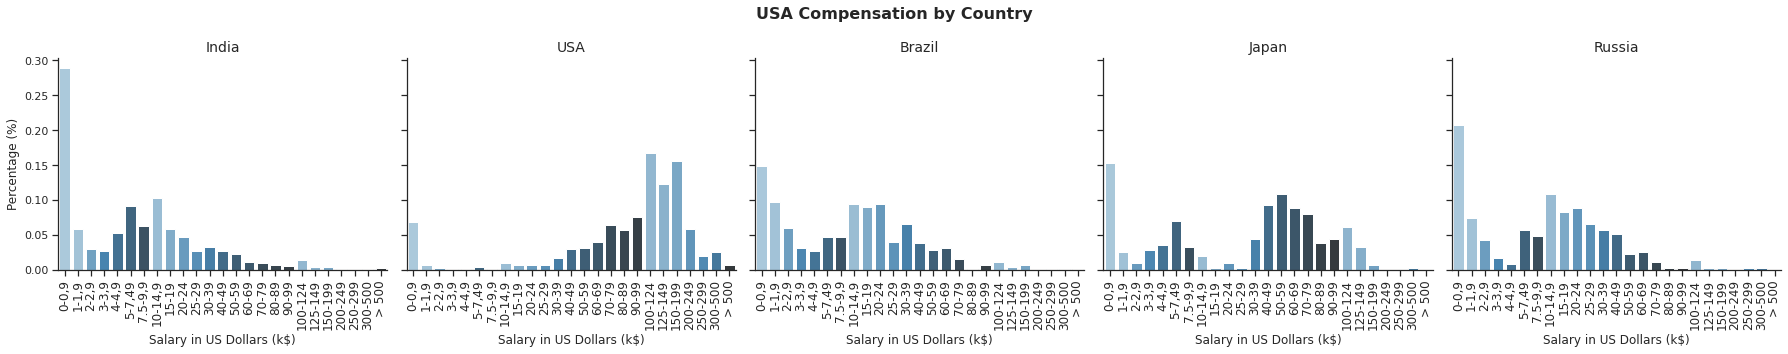

In [20]:
compensationCountry = compensation.groupby(['Q3','Q24']).size().reset_index(name="Count")
compensationCountry['%'] = compensationCountry['Count'].div(compensationCountry.groupby('Q3')['Count'].transform('sum'))
    
facetgrid_bar(compensationCountry,'Q3',country_list[0:5],5,'Q24','%','Q24', order_i,'USA Compensation by Country', 'Salary in US Dollars (k$)','Percentage (%)')    

In [21]:
compensationGender = compensation[compensation['Q3'] == 'USA']
need = ['Man', 'Woman']
compensationGender['Q2'] = np.where(compensationGender['Q2'].isin(need), compensationGender['Q2'], 'Nonbinary, self-describe or Undeclared')
compensationGender = compensationGender.groupby(['Q2','Q24']).size().reset_index(name="Count")
compensationGender['%'] = 100*(compensationGender['Count'].div(compensationGender.groupby('Q2')['Count'].transform('sum')))

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



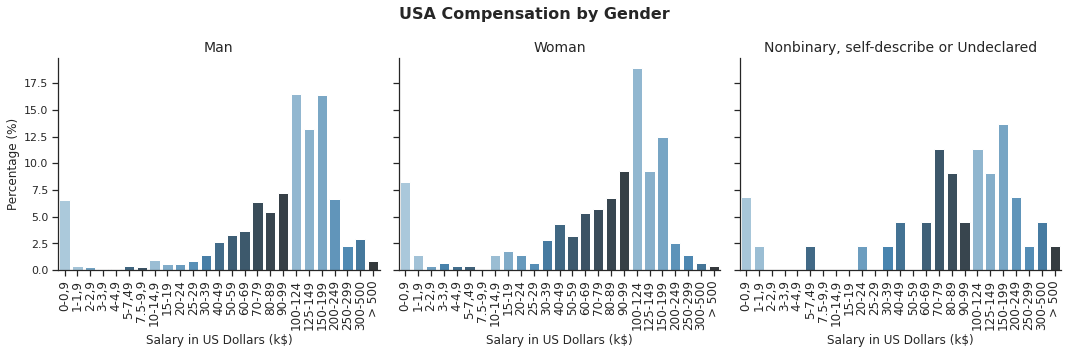

In [22]:
facetgrid_bar(compensationGender,'Q2',['Man','Woman','Nonbinary, self-describe or Undeclared'],3,'Q24','%','Q24', order_i,'USA Compensation by Gender', 'Salary in US Dollars (k$)','Percentage (%)')

* Overall, the histogram is similar across the genders. The distribution is skewed right to the top-end of the salary scale. All graphs show a peak at the left-end for the salary range of zero to less than a thousand dollars. The reason behind this could be the Students and Currently Unemployed who participated in the survey
* The male salaries have two peaks, in 100 - 124k USD and 150-199k USD, which account for approximately 35% of that population. For women, it is a different history. There is a clear peak in the salary range of 100 - 124k USD, accounting for 18% of women. The percentage of women earning salaries above the range of 124k USD is smaller than males
* In contrast, if we analyse the lower range of salaries, e.g. 15 - 90k USD, we can visualise that women have a higher percentage than males on most ranges
* Nonbinary, self-described or undeclared participants have higher participation if we consider salaries above 250K USD. While for Man and Woman it bearly reaches 2,5% across the last three salary options, for Nonbinary, self-described or undeclared participants it is stable at 2,5%, peaking to more than 5% considering an annual salary of 300-500k USD
* Clearly, this is a high-level analysis of a more complex and delicate issue, as we are comparing an aggregate of different roles across different genders

In [23]:
compensationRole = compensation[compensation['Q3'] == 'USA']
compensationRole = compensation[compensation['Q5'] != 'Other']

need = ['Man', 'Woman']

compensationRole['Q2'] = np.where(compensationRole['Q2'].isin(need), compensationRole['Q2'], 'Nonbinary, self-describe or Undeclared')
compensationRole = compensationRole.groupby(['Q5','Q24']).size().reset_index(name="Count")
compensationRole['%'] = 100*(compensationRole['Count'].div(compensationRole.groupby('Q5')['Count'].transform('sum')))

col_order = ['Business Analyst','Product/Project Manager','Data Analyst','Research Scientist', 'Statistician',  'Data Scientist', 'Machine Learning Engineer', 'Data Engineer','Software Engineer','DBA/Database Engineer']

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



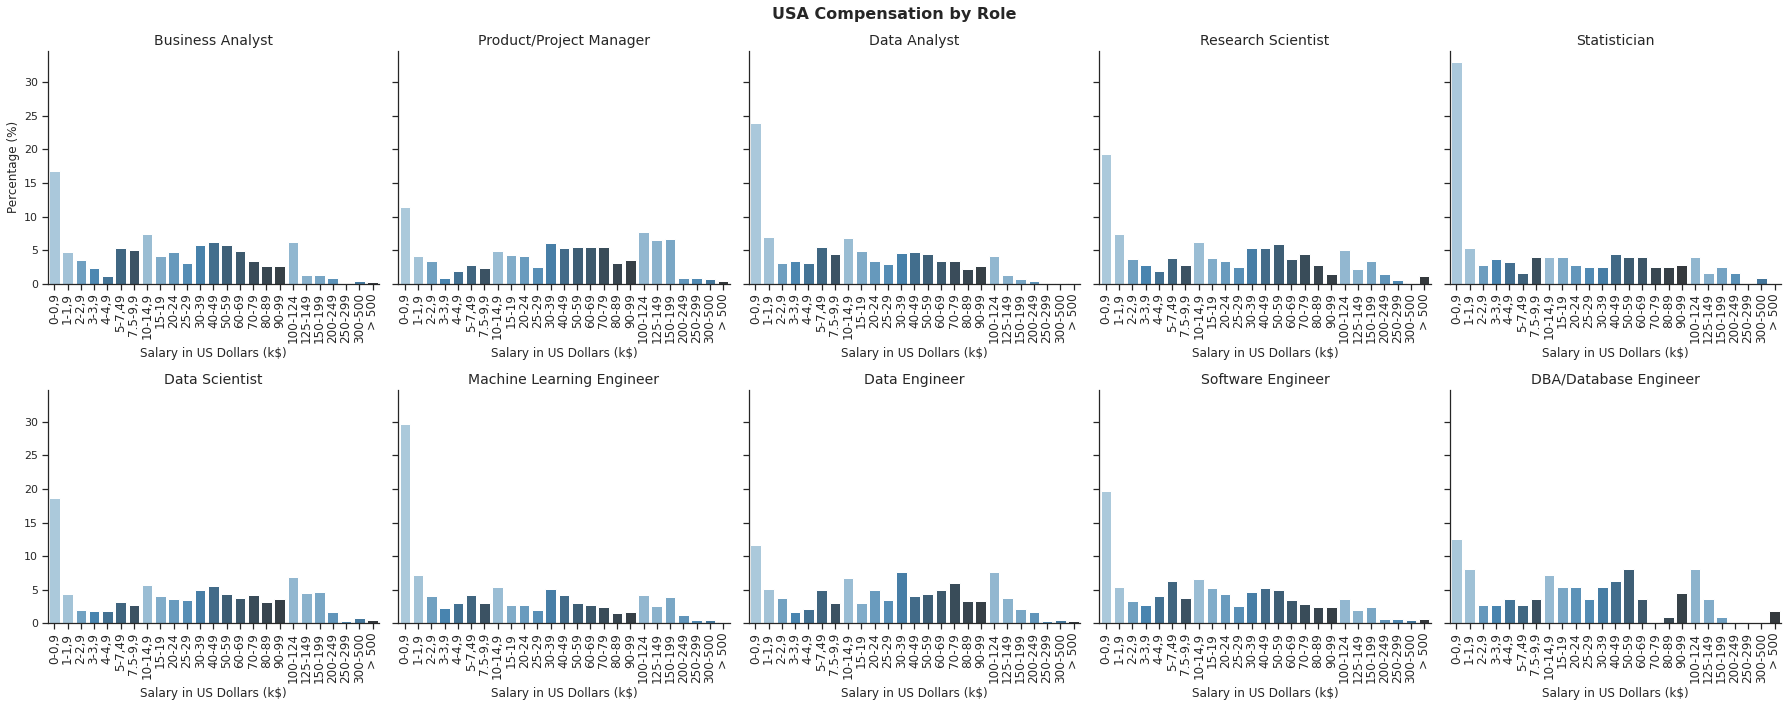

In [24]:
facetgrid_bar(compensationRole,'Q5',col_order,5,'Q24','%','Q24', order_i,'USA Compensation by Role', 'Salary in US Dollars (k$)','Percentage (%)')

* Analysing USA data, it surprises the number of respondents that receive less than 1.000 USD yearly. When looking at genders, one could assume it was related to Students and Currently Unemployed participants. Nevertheless, the same pattern is presented if we analyse the individual professions. It is not clear if this is a misinterpretation of the question, as a quick query over *PayScale.com* shows that the expected range salary for most of the above-listed roles is around 60 to 90K USD in the USA
* Most roles have a similar distribution, with smoothed peaks around 10 - 20k USD dollars and then again at 30-60k USD. Some roles, such as Data Scientist and Project Manager, also show a higher concentration of salaries within the range of 100 - 150K USD per year
* DBA/Database Engineer role has more prominent peaks and valleys, displaying a different distribution than all others. One reason could be that the number of participants with this role is not that expressive. As such, every answer had a higher percentage of participation in the final analysis

# **5. Conclusion**

The EDA focused on understanding the Kaggle and Data Science Community. While spread worldwide, we saw a predominance of India and USA participants. We also learned that most participants hold at least a Master's degree, and that formal education does pose a weight on the future role. 

The USA is where most doctorates reside, even though Switzerland has a higher percentage of doctorates considering its number of respondents. The numbers on gender and diversity were not exciting and have a similar trend across the diverse set of countries. However, we did see a higher percentage of partcipation of women and other minority groups in younger ages, providing hope that the tide is lifting everyone.

The relevant participation of third world countries, such as Brazil and Nigeria, also shows how technology can connect us all and make such countries more competitive. Fortunately, Data Science only requires passion and a decent internet connection. The amount of material and support of the DS community is great and makes it a great example of a career without boundaries.